# Part - 1 Data Visualization with Pandas, Seaborn, and Matplotlib

## TASK 1.1: Line Chart of Automobile Sales (1 point)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Yearly Automobile Sales'}, xlabel='Year'>

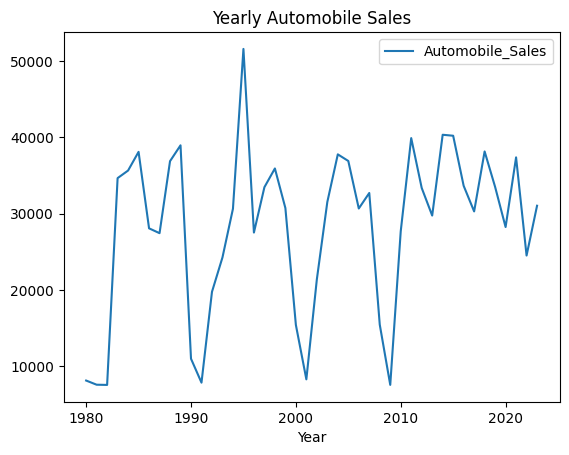

In [12]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

sales_by_year = data.groupby('Year')['Automobile_Sales'].sum().reset_index()
sales_by_year.plot(x='Year', y='Automobile_Sales', kind='line', title='Yearly Automobile Sales')

## TASK 1.2: Line Chart by Vehicle Type during Recession

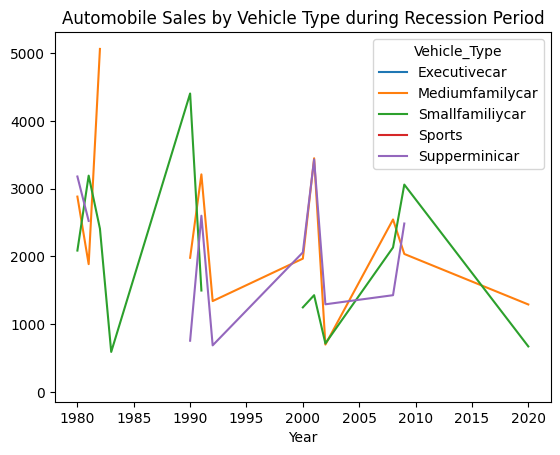

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for recession periods
recession_data = data[data['Recession'] == 1]

# Aggregate the data to remove duplicates
recession_data_agg = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# Pivot the aggregated data
pivot_data = recession_data_agg.pivot(index='Year', columns='Vehicle_Type', values='Automobile_Sales')

# Plotting the pivoted data
pivot_data.plot(kind='line', title='Automobile Sales by Vehicle Type during Recession Period')
plt.show()

## TASK 1.3: Seaborn Visualization Comparing Sales Trend 

<Axes: xlabel='Year', ylabel='Automobile_Sales'>

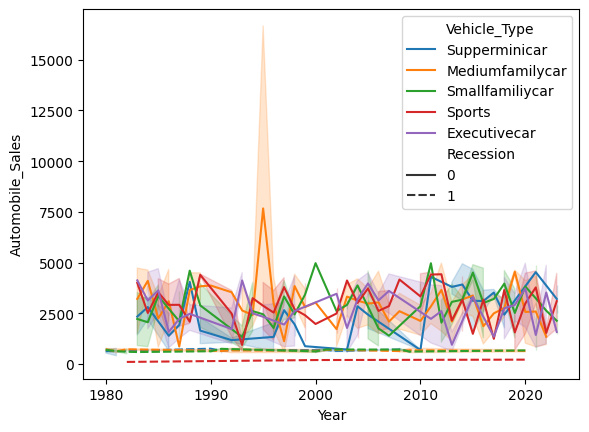

In [16]:
import seaborn as sns
sns.lineplot(data=data, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession')

## TASK 1.4: GDP Comparison during Recession vs Non-Recession

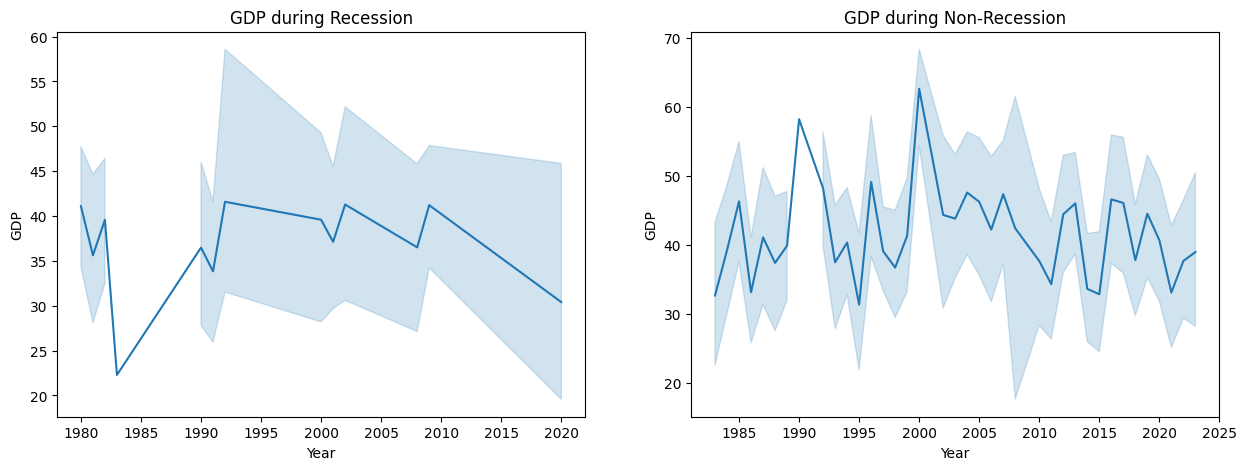

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=data[data['Recession'] == 1], x='Year', y='GDP', ax=ax[0]).set_title('GDP during Recession')
sns.lineplot(data=data[data['Recession'] == 0], x='Year', y='GDP', ax=ax[1]).set_title('GDP during Non-Recession')
plt.show()


## TASK 1.5: Bubble Plot for Seasonality Impact 

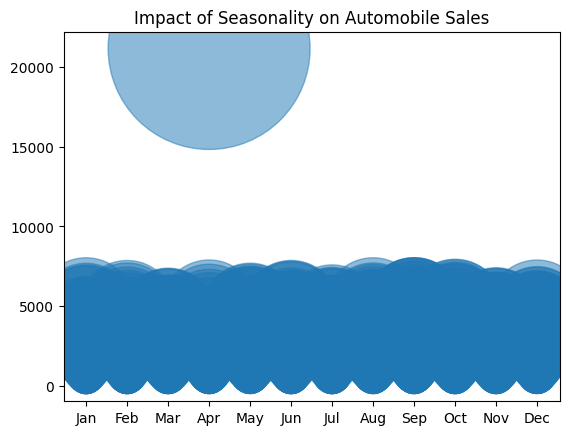

In [18]:
plt.scatter(x=data['Month'], y=data['Automobile_Sales'], s=data['Automobile_Sales'], alpha=0.5)
plt.title('Impact of Seasonality on Automobile Sales')
plt.show()

## TASK 1.6: Scatter Plot for Sales Volume vs Average Price

In [20]:
print(data.columns)

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


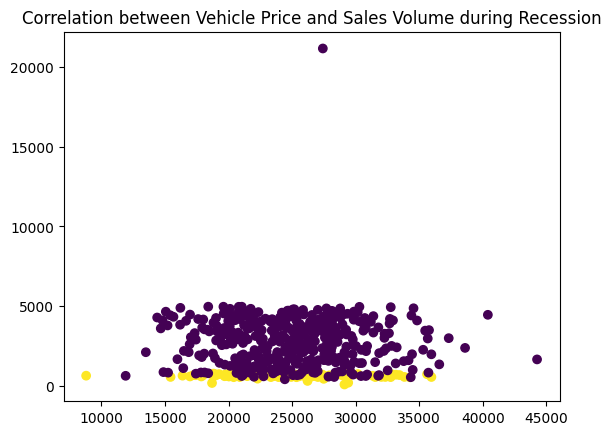

In [21]:
plt.scatter(data['Price'], data['Automobile_Sales'], c=data['Recession'])
plt.title('Correlation between Vehicle Price and Sales Volume during Recession')
plt.show()

## TASK 1.7: Pie Chart for Advertising Expenditure 

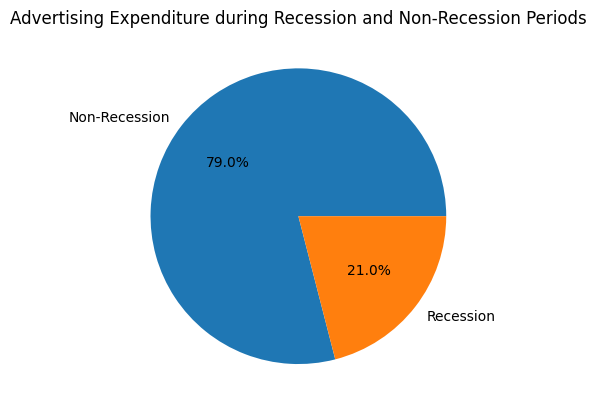

In [22]:
exp = data.groupby('Recession')['Advertising_Expenditure'].sum()
plt.pie(exp, labels=['Non-Recession', 'Recession'], autopct='%1.1f%%')
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

## TASK 1.8: Pie Chart for Advertisement Expenditure by Vehicle Type 

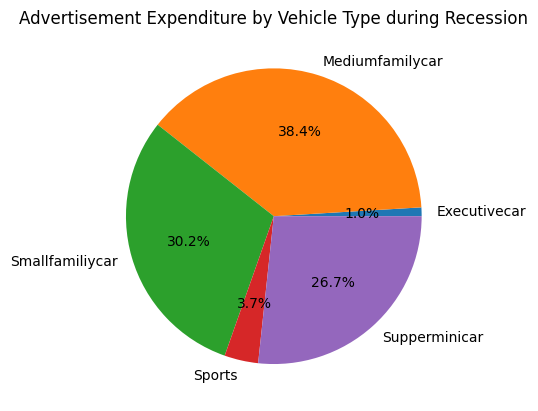

In [23]:
exp_by_vehicle = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.pie(exp_by_vehicle, labels=exp_by_vehicle.index, autopct='%1.1f%%')
plt.title('Advertisement Expenditure by Vehicle Type during Recession')
plt.show()

## TASK 1.9: Line Plot for Unemployment Rate Effect

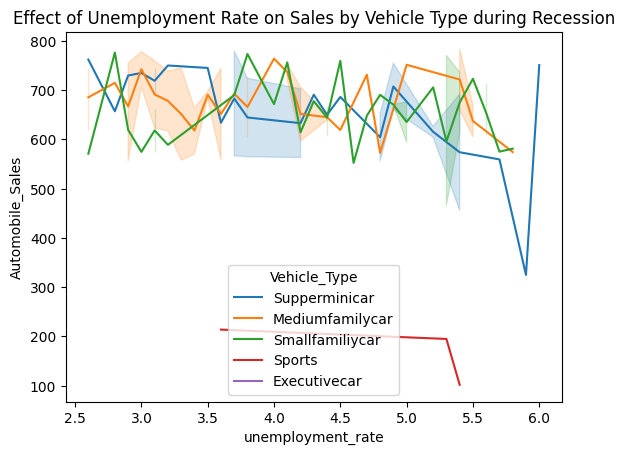

In [28]:
# Filter the data for recession periods
recession_data = data[data['Recession'] == 1]

# Use the correct column name 'unemployment_rate'
sns.lineplot(data=recession_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Effect of Unemployment Rate on Sales by Vehicle Type during Recession')
plt.show()

# Part 2: Building a Dash Application

## TASK 2.1: Create a Dash Application

In [30]:
!pip3 install dash

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 802.0 kB/s eta 0:00:00m eta 0:00:010:00:01


In [33]:
import dash
from dash import dcc, html  # Import html and dcc modules
from dash.dependencies import Input, Output

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the layout of the app
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center'}),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

## TASK 2.2: Add Dropdowns 

In [34]:
dcc.Dropdown(id='dropdown-id', options=[{'label': 'Option 1', 'value': '1'}, {'label': 'Option 2', 'value': '2'}])

Dropdown(options=[{'label': 'Option 1', 'value': '1'}, {'label': 'Option 2', 'value': '2'}], id='dropdown-id')

## TASK 2.3: Add Division for Output Display 

In [35]:
html.Div(id='output-container', className='output-class')

Div(id='output-container', className='output-class')

## TASK 2.4: Creating Callbacks for Input Update

In [46]:
@app.callback(Output('output-container', 'children'), [Input('dropdown-id', 'value')])
def update_output(value):
    return html.Div(f'Selected: {value}')


## TASK 2.5: Create and Display Recession Report Statistics

In [39]:
recession_data = data[data['Recession'] == 1]

## TASK 2.6: Create and Display Yearly Report Statistics

In [45]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load the data
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the layout of the app
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center'}),

    # Dropdown for selecting report type
    dcc.Dropdown(
        id='dropdown-statistics-type',
        options=[
            {'label': 'Yearly Statistics', 'value': 'yearly'},
            {'label': 'Recession Period Statistics', 'value': 'recession'}
        ],
        placeholder="Select Report Type",
        style={'width': '50%'}
    ),

    # Dropdown for selecting year
    dcc.Dropdown(
        id='dropdown-year',
        options=[{'label': year, 'value': year} for year in data['Year'].unique()],
        placeholder="Select a Year",
        style={'width': '50%'}
    ),
    
    html.Div(id='output-container', className='output-class')
])

# Define the callback function
@app.callback(
    Output('output-container', 'children'),
    [Input('dropdown-statistics-type', 'value'), Input('dropdown-year', 'value')]
)
def update_output(selected_report, selected_year):
    if selected_report == 'yearly' and selected_year is not None:
        # Filter the data based on the selected year
        yearly_data = data[data['Year'] == selected_year]
        
        # Create a plotly figure for yearly statistics
        fig = px.line(yearly_data, x='Month', y='Automobile_Sales', title=f'Automobile Sales in {selected_year}')
        return dcc.Graph(figure=fig)
    
    elif selected_report == 'recession':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]
        
        # Create a plotly figure for recession period statistics
        fig = px.line(recession_data, x='Year', y='Automobile_Sales', color='Vehicle_Type',
                      title='Automobile Sales During Recession Periods')
        return dcc.Graph(figure=fig)
    
    else:
        return "Please select a report type and year."

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
